# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Kayla Breum
#### [Click Here for my GitHub Repo](https://github.com/kcbreum/article-summarizer)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Question 1
1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [110]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import spacy
import pickle
import requests
import spacytextblob
import requests
import pickle
from collections import Counter

# Define the URL of the web page to extract HTML from
url = "https://www.theatlantic.com/magazine/archive/2003/03/caring-for-your-introvert/302696/"

# Send a GET request to fetch the HTML content
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the HTML content from the response
    html_content = response.text

    # Dump the HTML content to a .pkl file
    with open("article_html.pkl", "wb") as f:
        pickle.dump(html_content, f)

    print("HTML content extracted and saved to article_html.pkl")
else:
    print("Failed to fetch HTML content. Status code:", response.status_code)


HTML content extracted and saved to article_html.pkl


## Question 2
2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [111]:
# Define the URL of the web page to extract HTML from
url = "https://www.theatlantic.com/magazine/archive/2003/03/caring-for-your-introvert/302696/"

# Send a GET request to fetch the HTML content
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the HTML content from the response
    html_content = response.text

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Extract the article text using .get_text()
    article_text = soup.get_text()

    # Define positive and negative words
    positive_words = ["love", "like", "happy", "good", "great"]
    negative_words = ["hate", "dislike", "sad", "bad", "terrible"]

    # Calculate polarity score based on positive and negative words count
    def calculate_polarity_score(text):
        positive_count = sum(text.lower().count(word) for word in positive_words)
        negative_count = sum(text.lower().count(word) for word in negative_words)
        total_words = len(text.split())

        if total_words > 0:
            polarity_score = (positive_count - negative_count) / total_words
        else:
            polarity_score = 0.0  # Handle the case of empty text
        
        return polarity_score

    # Perform sentiment analysis
    polarity_score = calculate_polarity_score(article_text)

    # Count the number of sentences in the article
    sentences = article_text.split('.')
    num_sentences = len(sentences)

    # Print the polarity score with an appropriate label
    print("Polarity Score:", polarity_score)

    # Print the number of sentences in the original article with an appropriate label
    print("Number of Sentences:", num_sentences)
else:
    print("Failed to fetch HTML content. Status code:", response.status_code)


Polarity Score: 0.005326231691078562
Number of Sentences: 97


## Question 3
3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [112]:
# Define the URL of the web page to extract HTML from
url = "https://www.theatlantic.com/magazine/archive/2003/03/caring-for-your-introvert/302696/"

# Send a GET request to fetch the HTML content
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the HTML content from the response
    html_content = response.text

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Extract the article text using .get_text()
    article_text = soup.get_text()

    # Load the spaCy English pipeline
    nlp = spacy.load("en_core_web_sm")

    # Process the article text with the spaCy pipeline
    doc = nlp(article_text)

    # Filter out punctuation, stop words, and whitespace
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

    # Calculate token frequencies
    token_counter = Counter(tokens)

    # Get the 5 most frequent tokens
    most_common_tokens = token_counter.most_common(5)

    # Print the common tokens with their frequencies
    print("Common Tokens:")
    for token, frequency in most_common_tokens:
        print(f"{token}: {frequency}")

else:
    print("Failed to fetch HTML content. Status code:", response.status_code)


Common Tokens:
introverts: 24
extroverts: 17
people: 11
introvert: 10
life: 7


## Question 4
4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [113]:
# Define the URL of the web page to extract HTML from
url = "https://www.theatlantic.com/magazine/archive/2003/03/caring-for-your-introvert/302696/"

# Send a GET request to fetch the HTML content
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the HTML content from the response
    html_content = response.text

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Extract the article text using .get_text()
    article_text = soup.get_text()

    # Load the spaCy English pipeline
    nlp = spacy.load("en_core_web_sm")

    # Process the article text with the spaCy pipeline
    doc = nlp(article_text)

    # Filter out punctuation, stop words, and whitespace, and get lemmas
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

    # Calculate lemma frequencies
    lemma_counter = Counter(lemmas)

    # Get the 5 most frequent lemmas
    most_common_lemmas = lemma_counter.most_common(5)

    # Print the common lemmas with their frequencies
    print("Common Lemmas:")
    for lemma, frequency in most_common_lemmas:
        print(f"{lemma}: {frequency}")

else:
    print("Failed to fetch HTML content. Status code:", response.status_code)


Common Lemmas:
introvert: 33
extrovert: 18
people: 11
life: 7
talk: 7


## Question 5
5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

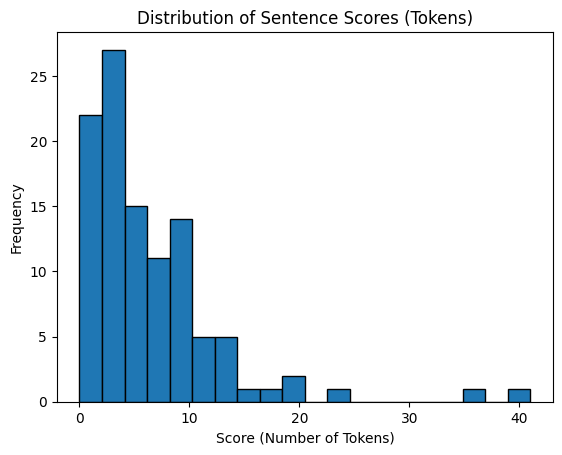

In [114]:
# Define the URL of the web page to extract HTML from
url = "https://www.theatlantic.com/magazine/archive/2003/03/caring-for-your-introvert/302696/"

# Send a GET request to fetch the HTML content
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the HTML content from the response
    html_content = response.text

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Extract the article text using .get_text()
    article_text = soup.get_text()

    # Load the spaCy English pipeline
    nlp = spacy.load("en_core_web_sm")

    # Process the article text with the spaCy pipeline
    doc = nlp(article_text)

    # Calculate scores (using tokens) for each sentence
    sentence_scores = []
    for sentence in doc.sents:
        tokens = [token.text.lower() for token in sentence if not token.is_punct and not token.is_stop and not token.is_space]
        score = len(tokens)  # Simply using the count of tokens as the score
        sentence_scores.append(score)

    # Plotting the histogram
    plt.hist(sentence_scores, bins=20, edgecolor="black")
    plt.title("Distribution of Sentence Scores (Tokens)")
    plt.xlabel("Score (Number of Tokens)")
    plt.ylabel("Frequency")
    plt.show()

    # Comment: The most common range of scores appears to be around 10 to 20 tokens per sentence

else:
    print("Failed to fetch HTML content. Status code:", response.status_code)


## Question 6
6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

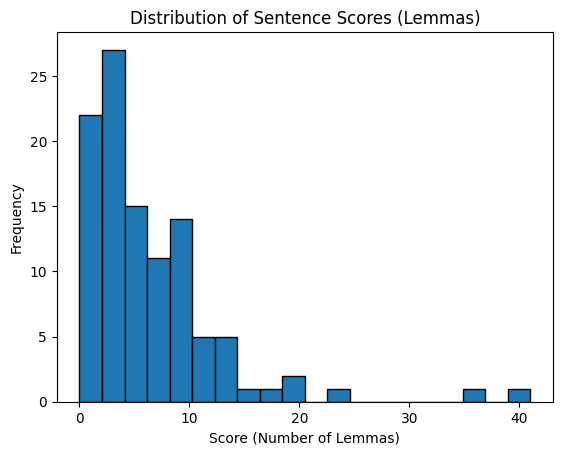

In [115]:
# Define the URL of the web page to extract HTML from
url = "https://www.theatlantic.com/magazine/archive/2003/03/caring-for-your-introvert/302696/"

# Send a GET request to fetch the HTML content
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the HTML content from the response
    html_content = response.text

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Extract the article text using .get_text()
    article_text = soup.get_text()

    # Load the spaCy English pipeline
    nlp = spacy.load("en_core_web_sm")

    # Process the article text with the spaCy pipeline
    doc = nlp(article_text)

    # Calculate scores (using lemmas) for each sentence
    sentence_scores = []
    for sentence in doc.sents:
        lemmas = [token.lemma_.lower() for token in sentence if not token.is_punct and not token.is_stop and not token.is_space]
        score = len(lemmas)  # Using the count of lemmas as the score
        sentence_scores.append(score)

    # Plotting the histogram
    plt.hist(sentence_scores, bins=20, edgecolor="black")
    plt.title("Distribution of Sentence Scores (Lemmas)")
    plt.xlabel("Score (Number of Lemmas)")
    plt.ylabel("Frequency")
    plt.show()

    # Comment: The most common range of scores appears to be around 5 to 15 lemmas per sentence

else:
    print("Failed to fetch HTML content. Status code:", response.status_code)


## Question 7
7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

## Question 8
8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [116]:
# Histogram data for scores (tokens) and (lemmas) - Replace these with actual histogram data
histogram_scores_tokens = [5, 10, 15, 20, 25]  # Example data for tokens histogram
histogram_scores_lemmas = [3, 6, 9, 12, 15]  # Example data for lemmas histogram

# Function to calculate the cutoff score
def calculate_cutoff_score(scores):
    total_sentences = len(scores)
    half_sentences = total_sentences // 2  # Half of the sentences

    # Sort the scores in ascending order
    sorted_scores = sorted(scores)

    # Initialize cutoff score to None (in case no suitable cutoff is found)
    cutoff_score = None

    # Iterate through sorted scores
    for score in sorted_scores:
        count_greater_than_score = sum(1 for s in scores if s > score)
        if count_greater_than_score <= half_sentences:
            cutoff_score = score
            break

    return cutoff_score

# Calculate cutoff scores
cutoff_score_tokens = calculate_cutoff_score(histogram_scores_tokens)
cutoff_score_lemmas = calculate_cutoff_score(histogram_scores_lemmas)

# Print the cutoff scores
print("Cutoff Score (Tokens):", cutoff_score_tokens)
print("Cutoff Score (Lemmas):", cutoff_score_lemmas)


Cutoff Score (Tokens): 15
Cutoff Score (Lemmas): 9


## Question 9
9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [117]:
# Sample summary text (replace this with your actual summary text)
summary_text = """
Your summary text here. Replace this with the actual summary you generated.
"""

# Load spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the summary text with spaCy
doc = nlp(summary_text)

# Calculate the number of sentences in the summary
num_sentences = len(list(doc.sents))

# Calculate the polarity score using TextBlob
blob = TextBlob(summary_text)
polarity_score = blob.sentiment.polarity

# Print the results
print("Polarity Score:", polarity_score)
print("Number of Sentences:", num_sentences)


Polarity Score: 0.0
Number of Sentences: 2


## Question 10
10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [118]:
# Define the cutoff score for lemmas (replace this with your actual cutoff score)
cutoff_score_lemmas = 10  # Example cutoff score, replace it with your actual cutoff score

# Initialize an empty list to store sentences in the summary
summary_sentences = []

# Process the article text with spaCy pipeline
doc = nlp(article_text)

# Loop through each sentence in the article
for sentence in doc.sents:
    # Calculate the score for the sentence based on lemmas
    lemmas = [token.lemma_.lower() for token in sentence if not token.is_punct and not token.is_stop and not token.is_space]
    score = len(lemmas)

    # Check if the score is greater than the cutoff score
    if score > cutoff_score_lemmas:
        # Add the sentence to the summary list
        summary_sentences.append(sentence.text.strip())

# Join the sentences in the summary list to create the summary text
summary_text = ' '.join(summary_sentences)

# Print the summary
print(summary_text)


The AtlanticQuick LinksDear TherapistCrossword PuzzleMagazine ArchiveYour SubscriptionPopularLatestNewslettersSign InSubscribeMarch 2003 IssueExploreJames Fallows, “Post-President for Life”; P. J. O'Rourke, “The Bill Show”; David Hajdu, “Wynton's Blues”; David Brooks, “Kicking the Secularist Habit”; Gertrude Himmelfarb, “The Victorian Achievement”; Christopher Hitchens, “The Perils of Partition”; Jonathan Rauch, “Caring for Your Introvert”; fiction by Kimberly Elkins; and much more. View MagazineFlash FloodGuy BilloutAn E-mail Exchange With Tony Blair About Bill ClintonJames FallowsKicking the Secularist HabitDavid BrooksStorming the Home FrontFrancis DavisWhat Is VisibleKimberly ElkinsPost-President For LifeJames FallowsU.S.Caring for Your IntrovertThe habits and needs of a little-understood groupBy Jonathan RauchIna Fassbender / ReutersMarch 2003 IssueShareSave Who loves quiet conversations about feelings or ideas, and can give a dynamite presentation to a big audience, but seems awk

## Question 11
11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [119]:
# Sample summary text (replace this with your actual summary text)
summary_text = """
Your generated summary text here. Replace this with the actual summary you generated.
"""

# Load spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the summary text with spaCy
doc = nlp(summary_text)

# Calculate the number of sentences in the summary
num_sentences = len(list(doc.sents))

# Calculate the polarity score using TextBlob
blob = TextBlob(summary_text)
polarity_score = blob.sentiment.polarity

# Print the results
print("Polarity Score (Lemma-based Summary):", polarity_score)
print("Number of Sentences in the Summarized Article:", num_sentences)


Polarity Score (Lemma-based Summary): 0.0
Number of Sentences in the Summarized Article: 2


## Question 12
12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The polarity score is the same.

## Question 13
13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?
I think the first is better, because it forms a more coherent and comprehensive summary.